# Applying labs to our dataset
## Lab 1

In [114]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [115]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [116]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

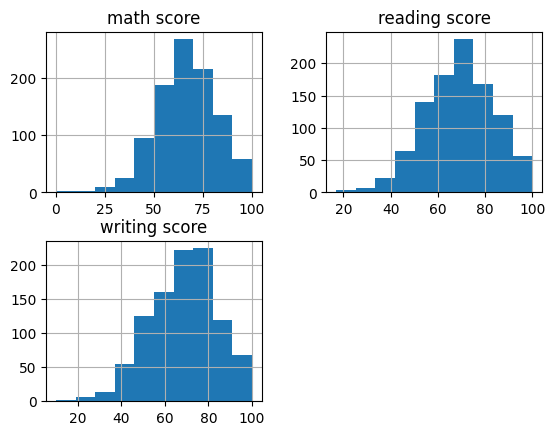

In [117]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot: xlabel='math score', ylabel='reading score'>

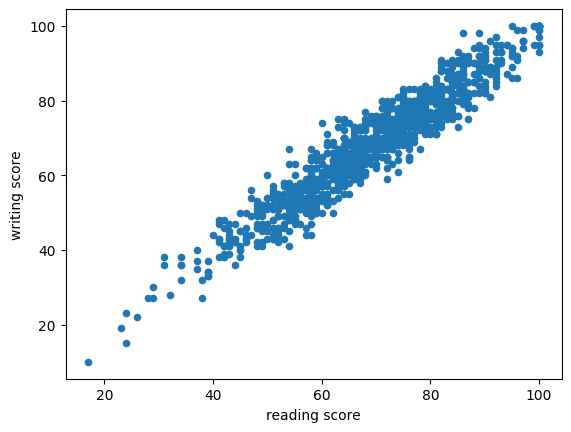

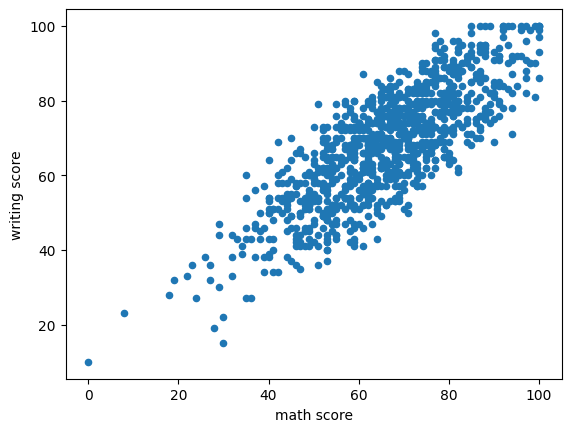

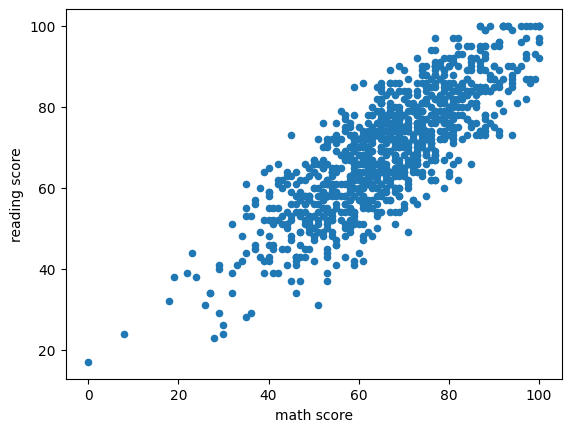

In [118]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Data Normalization & Factorization

In [119]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We need to factorize our categorical columns, so that all our data is numerical. 

In [120]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [121]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [122]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


### Splitting into train and test set and scaling

In [123]:
# Data where we keep the maths score numerical: 
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [124]:
# Data where we turn the maths score into categories of A, B, C, D, FAIL
# Discretize the data back into string format
def binFunction(row):
    if row["math score"] >= 70:
        return "A"
    elif row["math score"] >= 60:
        return "B"
    elif row["math score"] >= 50:
        return "C"
    elif row["math score"] >= 40:
        return "D"
    else:
        return "FAIL"
    
score_labels = ["F", "D", "C", "B", "A"]
exam_data_copy = df.copy()

# exam_data_copy["math score"] = pd.cut(exam_data_copy["math score"], bins = 5, labels=score_labels)

# data_categorical_target = exam_data_copy.apply(binFunction, axis=1)

# exam_data_copy

In [125]:
# Uncomment this if you want categorical data 

# X = exam_data_copy[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
# y = exam_data_copy[['math score']]

In [126]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [127]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

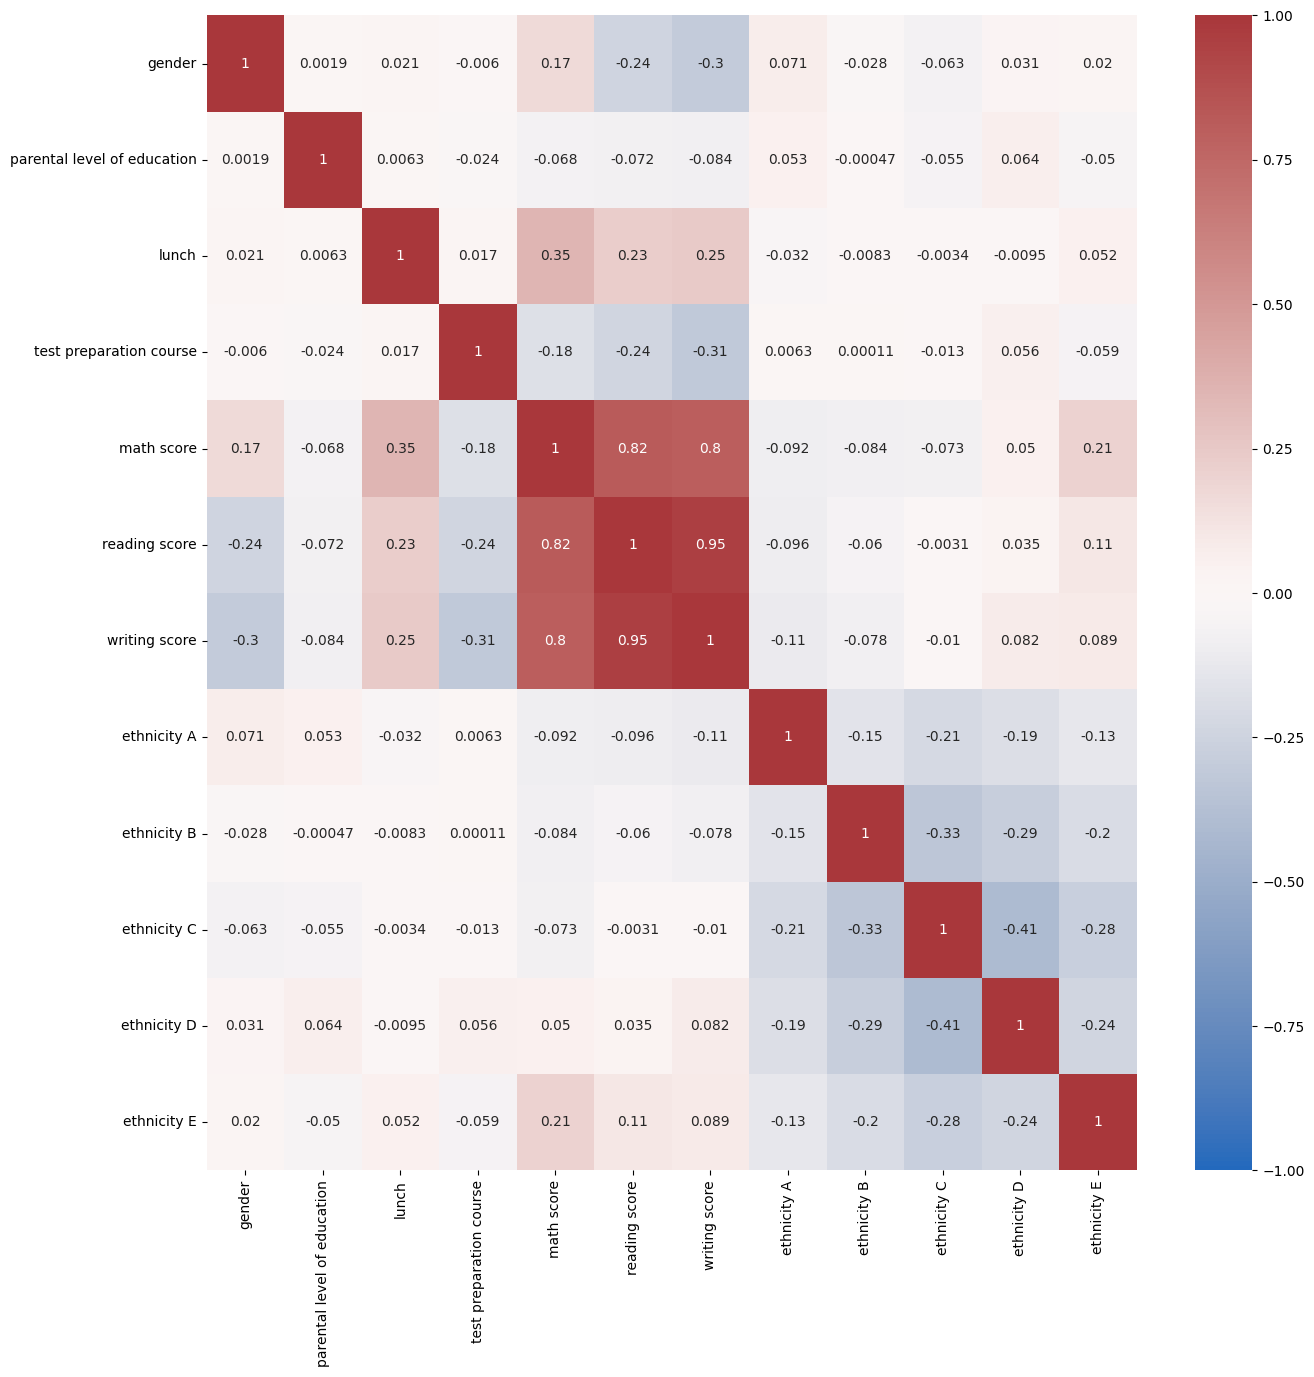

In [128]:
import seaborn as sns 

# Correlation Matrix: 
corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [129]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [130]:
data_top_correlation_features = df[['writing score', 'math score', 'gender']]

Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8759479423042054

Now let's see if there's a difference in accuracy when we only train with the top correlated features. Keep in mind that accuracy is not necessarily the best measure to evaluate a model. 

In [132]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_top_correlation_features, df[['math score']]
)

In [133]:
# 3 features. 
lr_three = LinearRegression() 
lr_three.fit(X_two_train, y_two_train)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_three.predict(X_two_test).squeeze()}
)
lr_three.score(X_two_test, y_two_test)

1.0

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [134]:
exam_data_copy['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [135]:
# Change to dataset where 'math score' is categorical. 

def binFunction(row):
    if row["math score"] >= 70:
        return 1
    else:
        return 0
    
data_categorical_target = df.copy().apply(binFunction, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_categorical_target)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [136]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [137]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = sgd_clf.predict(X_test)

In [138]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics ={}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))

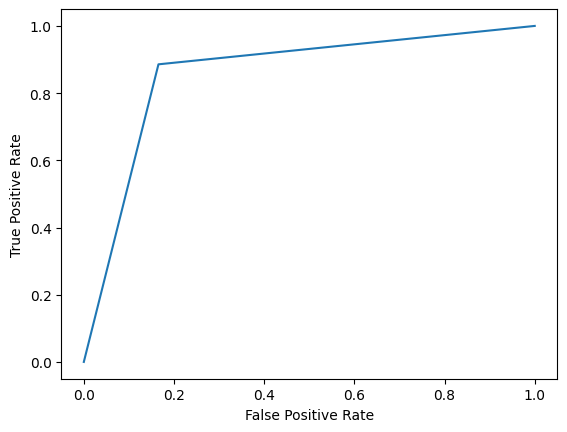

   accuracy  precision    recall  f1-score  roc-area
0     0.856   0.794872  0.885714  0.837838  0.860099


In [139]:
# Get metrics for SDG Classifier 
getMetrics(y_true, y_pred)

<AxesSubplot: >

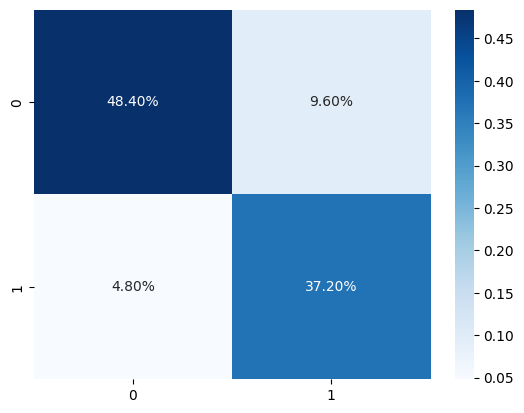

In [140]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5

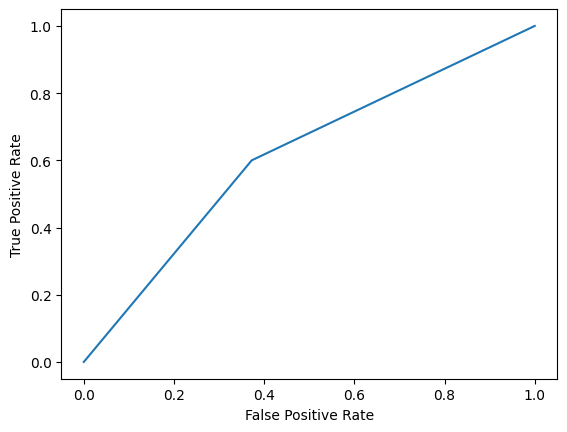

   accuracy  precision  recall  f1-score  roc-area
0     0.616   0.538462     0.6  0.567568  0.613793


In [141]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
getMetrics(y_test, multi_nom_y_pred)

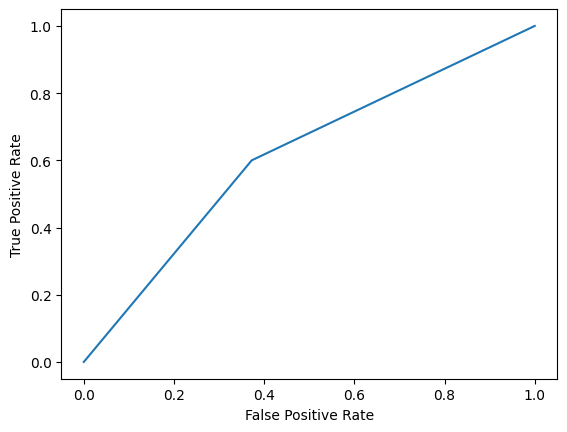

   accuracy  precision  recall  f1-score  roc-area
0     0.616   0.538462     0.6  0.567568  0.613793


In [142]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=1.0, fit_prior=False)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

getMetrics(y_test, clf_pred)

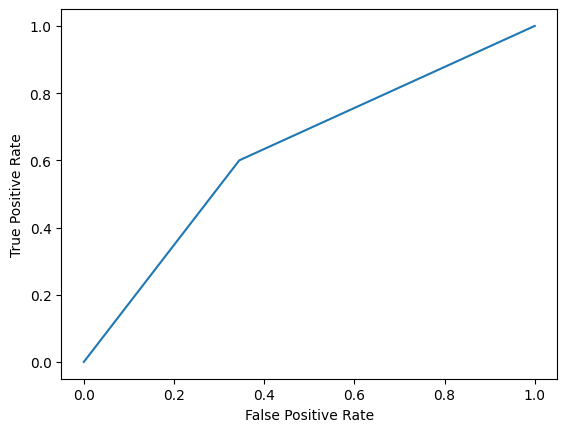

   accuracy  precision  recall  f1-score  roc-area
0     0.632   0.557522     0.6  0.577982  0.627586


In [143]:
from sklearn.naive_bayes import CategoricalNB

cat_nb = CategoricalNB(alpha=1.0, fit_prior=False)
cat_nb.fit(X_train, y_train)
cat_nb_pred = cat_nb.predict(X_test)

getMetrics(y_test, cat_nb_pred)

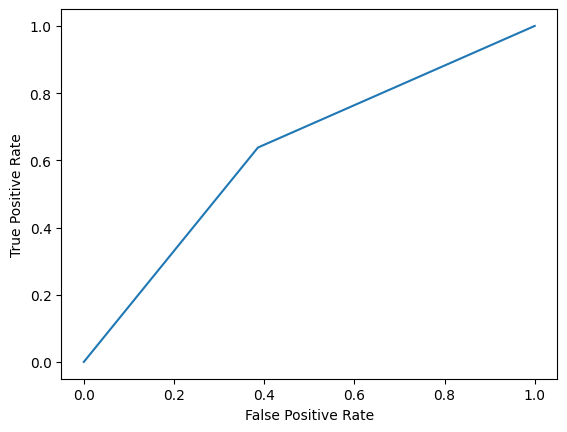

   accuracy  precision    recall  f1-score  roc-area
0     0.624   0.544715  0.638095  0.587719  0.625944


In [144]:
from sklearn.naive_bayes import BernoulliNB

benoulli_nb = BernoulliNB(alpha=1.0, fit_prior=False)
benoulli_nb.fit(X_train, y_train)
benoulli_nb_pred = benoulli_nb.predict(X_test)

getMetrics(y_test, benoulli_nb_pred)

In [145]:
!pip install pgmpy


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
from pgmpy.models import BayesianModel

In [147]:
bayesian_model = BayesianModel([("gender", "lunch"), ("lunch", "parental level of education"), ("parental level of education", "math score")])

d:\Python310\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [148]:
bayesian_model.fit(data)

In [149]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bayesian_model)
q = infer.query(variables=["math score"],evidence={"gender": "male"})

d:\Python310\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [150]:
values = q.values
len(values)

81

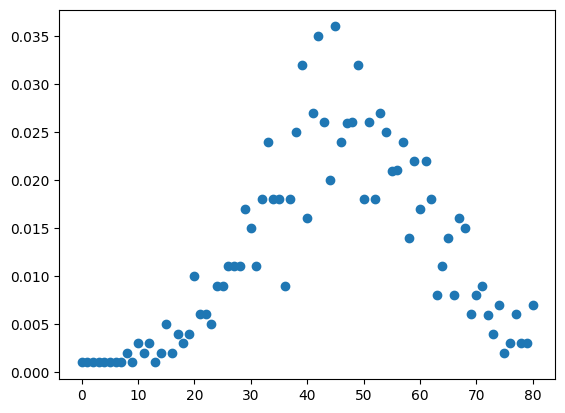

In [151]:
plt.scatter(range(0, 81), values)

In [152]:
# Lab 5
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [153]:


from sklearn.cluster import KMeans

def plot_clusters(X, y=None):
    plt.scatter (X[:, 0], X[:, 1], c=y, s=1)
    plt.x_label("$x_1$", fontsize=14)
    plt.y_label("$x_2", fontsize=14, rotation=0)


x_k_means = X[["reading score", "writing score"]].to_numpy()
x_train_k, x_test_k = train_test_split(x_k_means) 



In [154]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x_train_k)

kmeans.cluster_centers_

array([[68.67391304, 67.96521739],
       [39.45762712, 37.88135593],
       [91.38      , 91.38      ],
       [56.50292398, 54.30409357],
       [79.59473684, 78.65789474]])

In [155]:
kmeans.labels_

array([4, 4, 1, 4, 2, 4, 3, 4, 3, 0, 4, 0, 3, 3, 0, 1, 4, 0, 3, 0, 4, 3,
       0, 4, 4, 0, 4, 0, 2, 2, 0, 2, 4, 0, 3, 4, 1, 3, 2, 4, 3, 3, 0, 0,
       0, 2, 0, 3, 3, 3, 3, 0, 1, 3, 3, 4, 3, 2, 4, 0, 2, 3, 0, 0, 0, 1,
       1, 2, 3, 0, 4, 2, 4, 4, 0, 3, 0, 2, 2, 2, 3, 0, 4, 2, 4, 3, 2, 0,
       0, 0, 2, 1, 4, 3, 0, 4, 2, 4, 0, 4, 0, 0, 0, 4, 0, 4, 3, 4, 0, 4,
       2, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 4, 4, 4, 3, 3, 2, 0, 2, 4, 0, 4,
       4, 3, 0, 3, 4, 3, 0, 3, 3, 4, 2, 4, 2, 0, 0, 0, 0, 4, 0, 3, 4, 0,
       0, 4, 0, 0, 3, 3, 4, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 4, 0, 1, 3, 2,
       4, 0, 0, 2, 0, 4, 4, 4, 0, 4, 0, 3, 4, 1, 0, 3, 0, 3, 4, 1, 0, 0,
       3, 0, 4, 1, 2, 0, 0, 0, 4, 4, 0, 3, 4, 1, 0, 0, 3, 2, 0, 3, 2, 2,
       2, 0, 4, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 4, 2, 4, 2, 1, 4, 3, 3, 2,
       3, 0, 4, 4, 4, 3, 3, 0, 3, 0, 4, 4, 3, 2, 2, 0, 1, 4, 3, 1, 4, 1,
       2, 4, 2, 1, 2, 0, 4, 4, 4, 4, 3, 0, 0, 1, 3, 4, 0, 0, 2, 4, 0, 4,
       0, 1, 3, 0, 3, 1, 2, 4, 2, 0, 0, 3, 0, 0, 0,

# Plot stuff

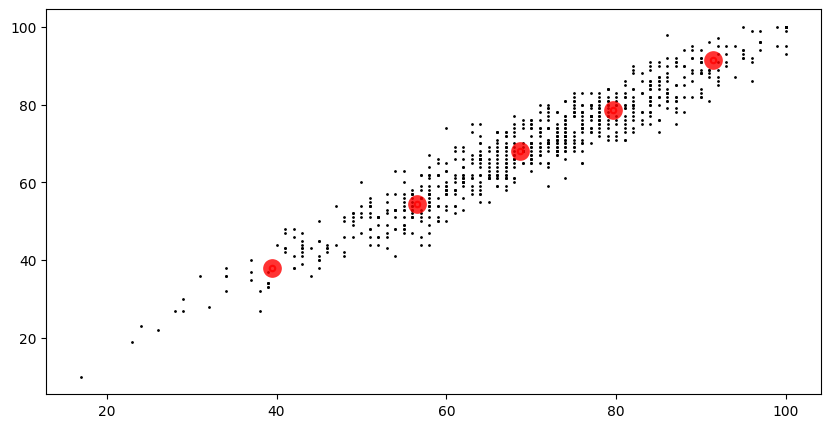

In [156]:
def plot_k_data(X):
    plt.figure(figsize=(10,5))
    plt.plot(X[:, 0], X[:, 1] , "k.", markersize=2)

def plot_centroids(centroids):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=30, linewidths=8, color="r", zorder=10, alpha =0.8)

plot_k_data(x_train_k)
plot_centroids(kmeans.cluster_centers_)


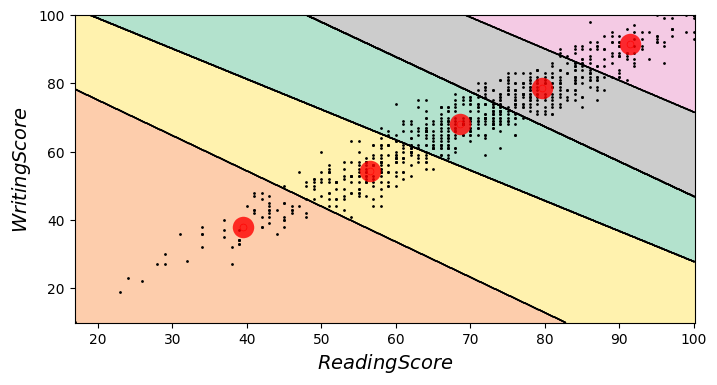

In [157]:
# Decision borders
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=10,
                color=circle_color, zorder=10, alpha=0.8)
    # plt.scatter(centroids[:, 0], centroids[:, 1],
    #             marker='o', s=30, linewidths=8,
    #             color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$Reading Score$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$Writing Score$", fontsize=14, rotation=90)
        
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x_train_k)
plt.show()

In [158]:
# Hard vs Soft clustering
# Converts to a cluster distance space
kmeans.transform(x_train_k)


array([[12.48594597, 53.22580399, 22.47418074, 30.00731532,  7.7124104 ],
       [22.18114503, 64.11670853, 10.43689609, 40.47142262,  6.9241918 ],
       [45.1018526 ,  3.90824084, 77.69252731, 26.8068753 , 60.35114101],
       ...,
       [16.85084629, 58.58301172, 16.34040391, 35.05977055,  3.70308698],
       [ 3.24823349, 40.84430679, 33.95598327, 17.22130877, 16.69122715],
       [ 7.60341307, 48.65133413, 26.33721322, 25.02993113,  9.37450128]])

In [159]:
# Run k-means for 3 iterations
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=3, random_state=1)

kmeans_iter1.fit(x_train_k)
kmeans_iter2.fit(x_train_k)
kmeans_iter3.fit(x_train_k)

d:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
d:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
d:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

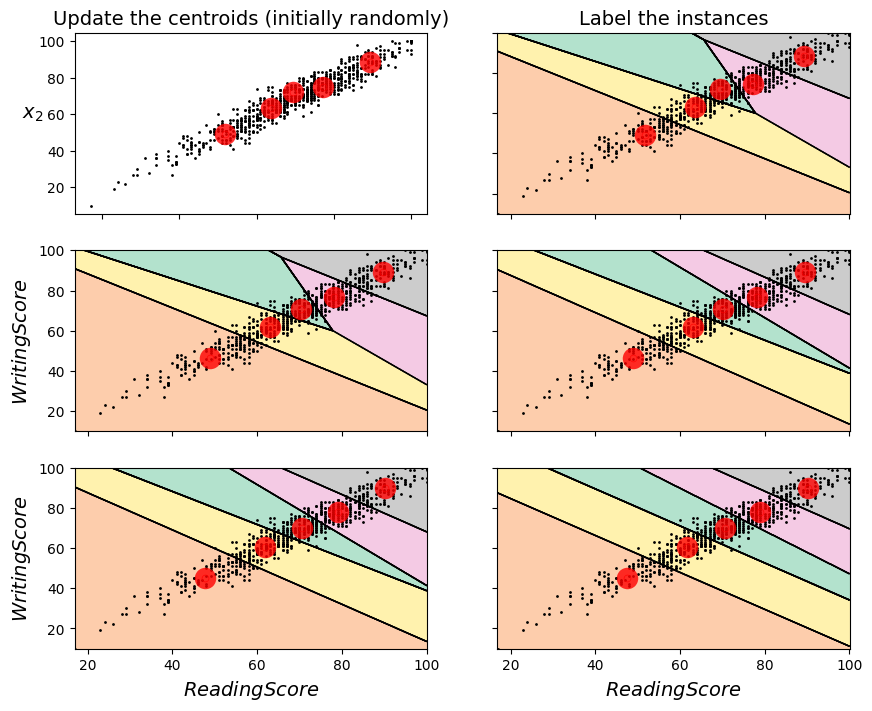

In [160]:
# Plot iteration results
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(x_train_k)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, x_train_k, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, x_train_k, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, x_train_k, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, x_train_k, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, x_train_k, show_ylabels=False)

plt.show()

In [161]:
# Inertia
# This is the sum of difference of squares
kmeans.inertia_

# This was in the lectures
# To calculate this we do:
x_dist = kmeans.transform(x_train_k)
np.sum(x_dist[np.arange(len(x_dist)), kmeans.labels_]**2) 


31380.33299620235

In [162]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

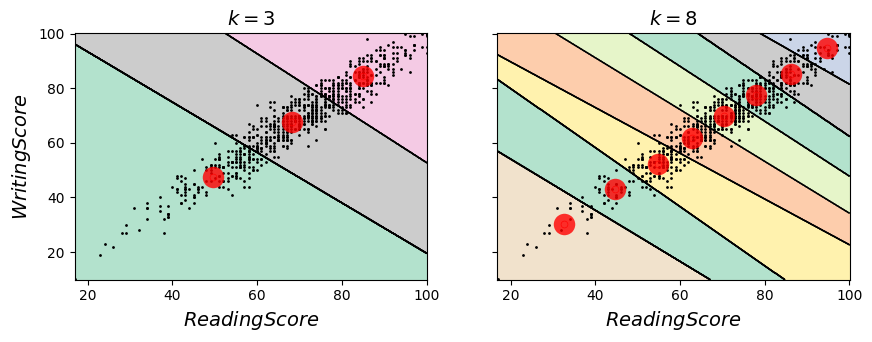

In [163]:
# Optimal clusters

kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)


plot_clusterer_comparison(kmeans_k3, kmeans_k8, x_train_k, "$k=3$", "$k=8$")


In [164]:
kmeans_k3.inertia_

68963.40519128417

In [165]:
kmeans_k8.inertia_

17217.117861667022

In [166]:
# We can find optimal clusters by plotting the inertia as a function of k
# Like so:


kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_train_k) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

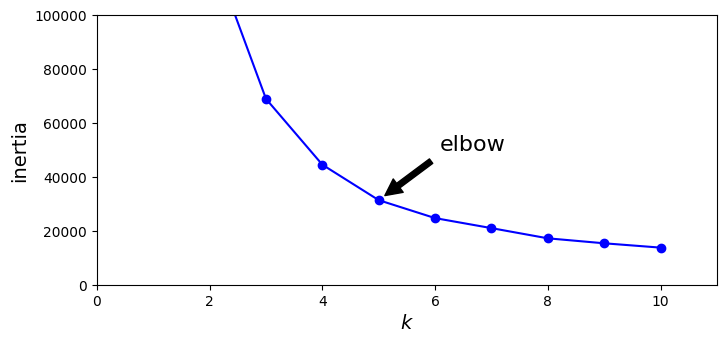

In [167]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("inertia", fontsize=14)
plt.annotate("elbow", xy=(5, inertias[4]), xytext=(0.55, 0.55), textcoords="figure fraction", fontsize=16, arrowprops=dict(facecolor="black", shrink=0.1))
plt.axis([0, 11, 0, 100000])
plt.show()

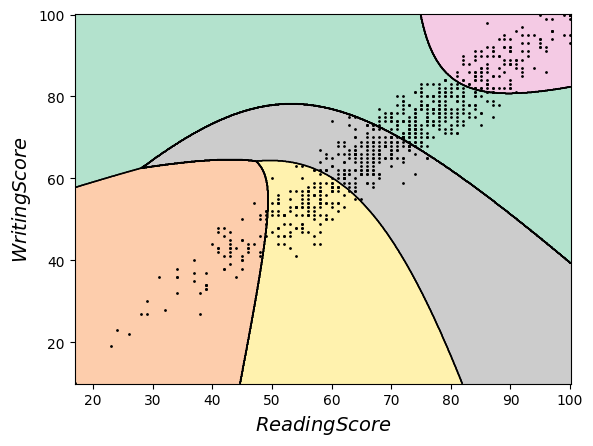

In [168]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_y_pred = gmm.fit(x_train_k)
gmm_y_pred.means_



plot_decision_boundaries(gmm, x_train_k, show_centroids=False)

# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

num of clusters 1
estimated number of noise points 483
num of core samples  83


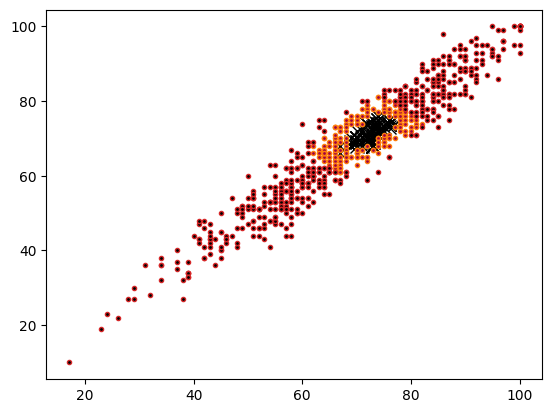

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75
5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,83,78


In [169]:
from sklearn.cluster import DBSCAN

# eps is the max distance a point can be from another to be considered in the neighborhood
# min samples is the number of points in a neighborhood to be considered a core point
db = DBSCAN(eps=5.5, min_samples=80, metric="manhattan").fit(x_train_k)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # create an array of false values

core_samples_mask[db.core_sample_indices_] = True # set the indices for the core samples to true


n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1) # noise samples are given the label -1

unique_labels = set(db.labels_) # converts our array of different 

colours = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colours):
    # Remove colour black for noise
    if k == -1:
        col = [0, 0, 0, 1]





    class_member_mask = db.labels_ == k

    # plots the points for the core points
    xy = x_train_k[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "x", markerfacecolor=tuple(col), markeredgecolor="k", markersize=10)

    # Plots the points for the not core points
    xy = x_train_k[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markersize=3)
    
print("num of clusters %d" % n_clusters)
print("estimated number of noise points %d" % n_noise_) 
print("num of core samples ", len(db.core_sample_indices_))
plt.show()

X.head(6)

### This is terrible :)

# Affinity Propagation

estimate number of cluster 18


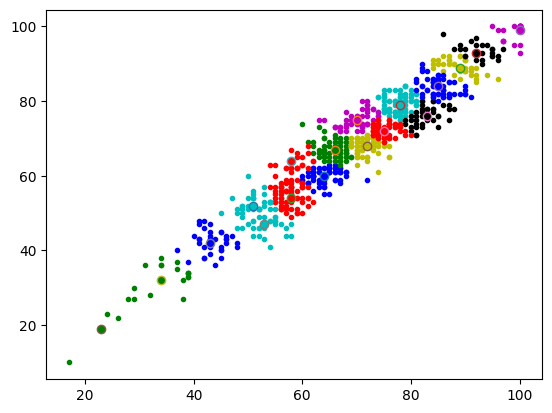

<Figure size 10000x5000 with 0 Axes>

In [170]:
from sklearn.cluster import AffinityPropagation
from itertools import cycle

ap = AffinityPropagation(preference= -600, random_state=0).fit(x_train_k)

n_clusters = len(ap.cluster_centers_indices_)

print("estimate number of cluster %d" % n_clusters)


def plot_clusters():
    colours = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

    for k, col in zip(range(n_clusters), colours):
        class_members = ap.labels_ == k

        cluster_center = x_train_k[ap.cluster_centers_indices_[k]]
        plt.plot(x_train_k[class_members, 0], x_train_k[class_members, 1], col + ".")
        plt.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markersize=6)
        
        # Draws lines between cluster centre and each point
        # for x in x_train_k[class_members]:
        #     plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    plt.figure(figsize=(100, 50))
    plt.show()

plot_clusters()


# Lab 9

In [171]:
# y = df["math score"]
# print(y)
y = (df["math score"] >=70).astype(int)

x = df[["reading score", "writing score"]]
print(x, y)

# from sklearn.datasets import load_iris
# iris = load_iris()

# X = iris.data[:, (2, 3)]
# # X

# Y = (iris.target == 0).astype(int)
# Y

     reading score  writing score
0               72             74
1               90             88
2               95             93
3               57             44
4               78             75
..             ...            ...
995             99             95
996             55             55
997             71             65
998             78             77
999             86             86

[1000 rows x 2 columns] 0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    0
999    1
Name: math score, Length: 1000, dtype: int32


In [172]:
from sklearn.linear_model import Perceptron
per = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per.fit(x, y)

Perceptron(random_state=42)

In [173]:
y_pred = per.predict([[90, 80]])
y_pred

d:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1])

In [174]:
a = -per.coef_[0][0] / per.coef_[0][1]
b = -per.intercept_ / per.coef_[0][1]

# print(a)
# print(b)

# print(x)
# print(y)


In [175]:
# Use to view the entire dataframe output
# with pd.option_context("display.max_rows", None, "display.max_columns", None):
# # writing_high = df.loc["writing score"]
#     df.loc[df["reading score"] > 90]


In [176]:
axes = [0, 100, 0, 100] # Sets tje axes numbers

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per.predict(x_new)
zz = y_predict.reshape(x0.shape)

for i in range(len(y)):
    print("this is somethign", x[y==1])

# plt.figure(figsize=(10, 4))
# plt.plot(x[y == 1], x[y == 1], "bs", label="pass")
# # plt.plot(x[y == 0], x[y == 0], "yo", label="fail")

# plt.plot([axes[0], axes[1]], [a * axes[0] + b,a * axes[1] + b], "k-", linewidth=2)
# from matplotlib.colors import ListedColormap

# custom_cmap = ListedColormap(["#9898ff", "#fafab0"])

# plt.contourf(x0, x1, zz, cmap=custom_cmap)
# plt.xlabel("reading score?", fontsize=14)
# plt.ylabel("writing score?", fontsize=14)
# plt.legend(loc="lower right", fontsize=14)
# plt.axis(axes)

d:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


this is somethign      reading score  writing score
0               72             74
2               95             93
4               78             75
5               83             78
6               95             92
..             ...            ...
984             75             82
987             75             76
990             81             75
995             99             95
999             86             86

[409 rows x 2 columns]
this is somethign      reading score  writing score
0               72             74
2               95             93
4               78             75
5               83             78
6               95             92
..             ...            ...
984             75             82
987             75             76
990             81             75
995             99             95
999             86             86

[409 rows x 2 columns]
this is somethign      reading score  writing score
0               72             74
2             

# Lab ?

In [178]:
x = np.load("./data/smiley_X.npy")
y = np.load("./data/smiley_y.npy")

class_names = ["happy", "sad"]
x_train, x_test, y_train, y_test = train_test_split(x, y)
class_names[y_train[0].astype(int)]

'happy'

In [179]:
print(y_train[0])

0.0


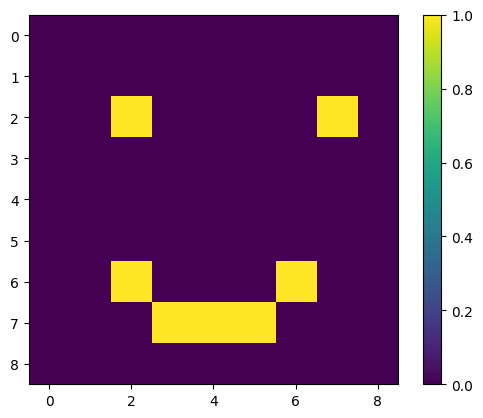

In [180]:
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [181]:
print(x_train[2])
print(y_train[2])

[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]
0.0


In [182]:
x_train = x_train
x_test = x_test

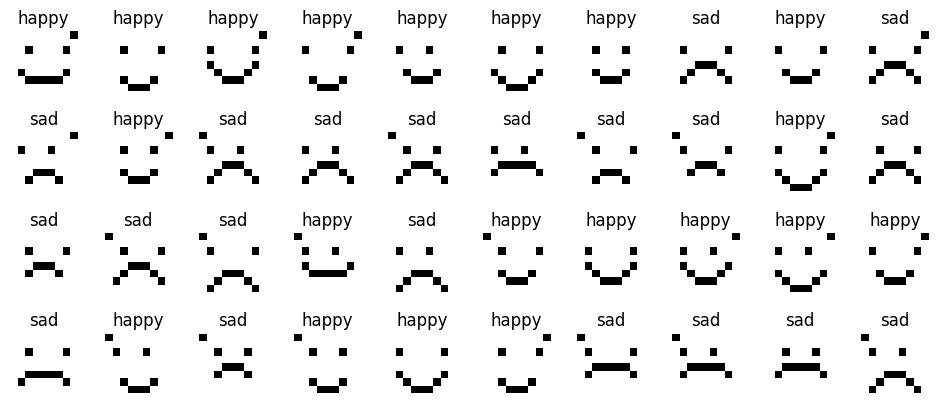

In [183]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap=plt.cm.binary, interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index].astype(int)], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



In [184]:
x_train.shape

(108, 9, 9, 1)

In [185]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,9)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [186]:
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])



In [187]:
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 2.2360 - accuracy: 0.0463
Epoch 2/10
4/4 [==============================] - 0s 1ms/step - loss: 1.9623 - accuracy: 0.2870
Epoch 3/10
4/4 [==============================] - 0s 997us/step - loss: 1.7146 - accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 1.4801 - accuracy: 0.8889
Epoch 5/10
4/4 [==============================] - 0s 1ms/step - loss: 1.2642 - accuracy: 0.9259
Epoch 6/10
4/4 [==============================] - 0s 998us/step - loss: 1.0653 - accuracy: 0.9352
Epoch 7/10
4/4 [==============================] - 0s 664us/step - loss: 0.8893 - accuracy: 0.9352
Epoch 8/10
4/4 [==============================] - 0s 997us/step - loss: 0.7378 - accuracy: 0.9537
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 0.6098 - accuracy: 0.9537
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.9537


In [188]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1) # verbose = 0 silent, verbose = 1 progress bar
print("\nTest Accuracy:", test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.8611

Test Accuracy: 0.8611111044883728


In [189]:
classifications = model.predict(x_test)


2/2 [==============================] - 0s 3ms/step


In [190]:
print(classifications[3])

[0.18003783 0.73006517 0.00703605 0.01032485 0.00664113 0.00931782
 0.01679472 0.02665436 0.00551036 0.00761767]


In [191]:
np.argmax(classifications[3])

1

In [192]:
np.max(classifications[3])

0.73006517

In [193]:
class_names[np.argmax(classifications[3])]

'sad'

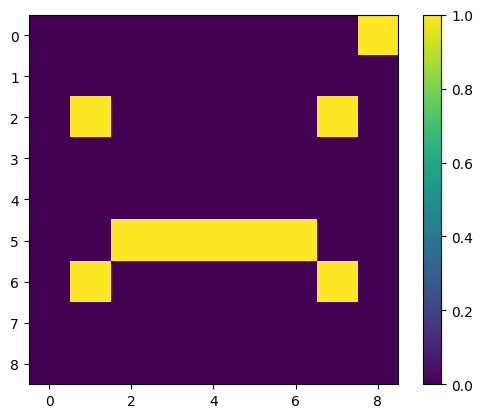

In [194]:
plt.imshow(x_test[3])
plt.colorbar()
plt.grid(False)

In [195]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_labels = np.argmax(predictions_array)
    thisplot[predicted_labels].set_color("red")
    thisplot[true_label].set_color("blue")

In [196]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
y_test = y_test.astype(int)
print(y_test)

[1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]


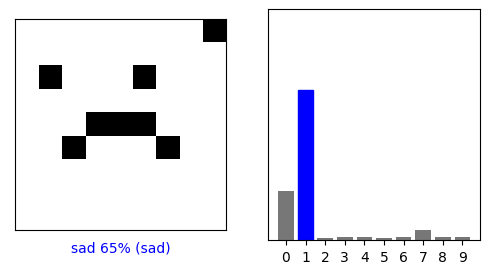

In [197]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

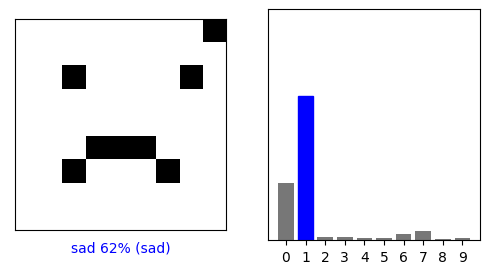

In [198]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i], y_test)
plt.show()

IndexError: index 36 is out of bounds for axis 0 with size 36

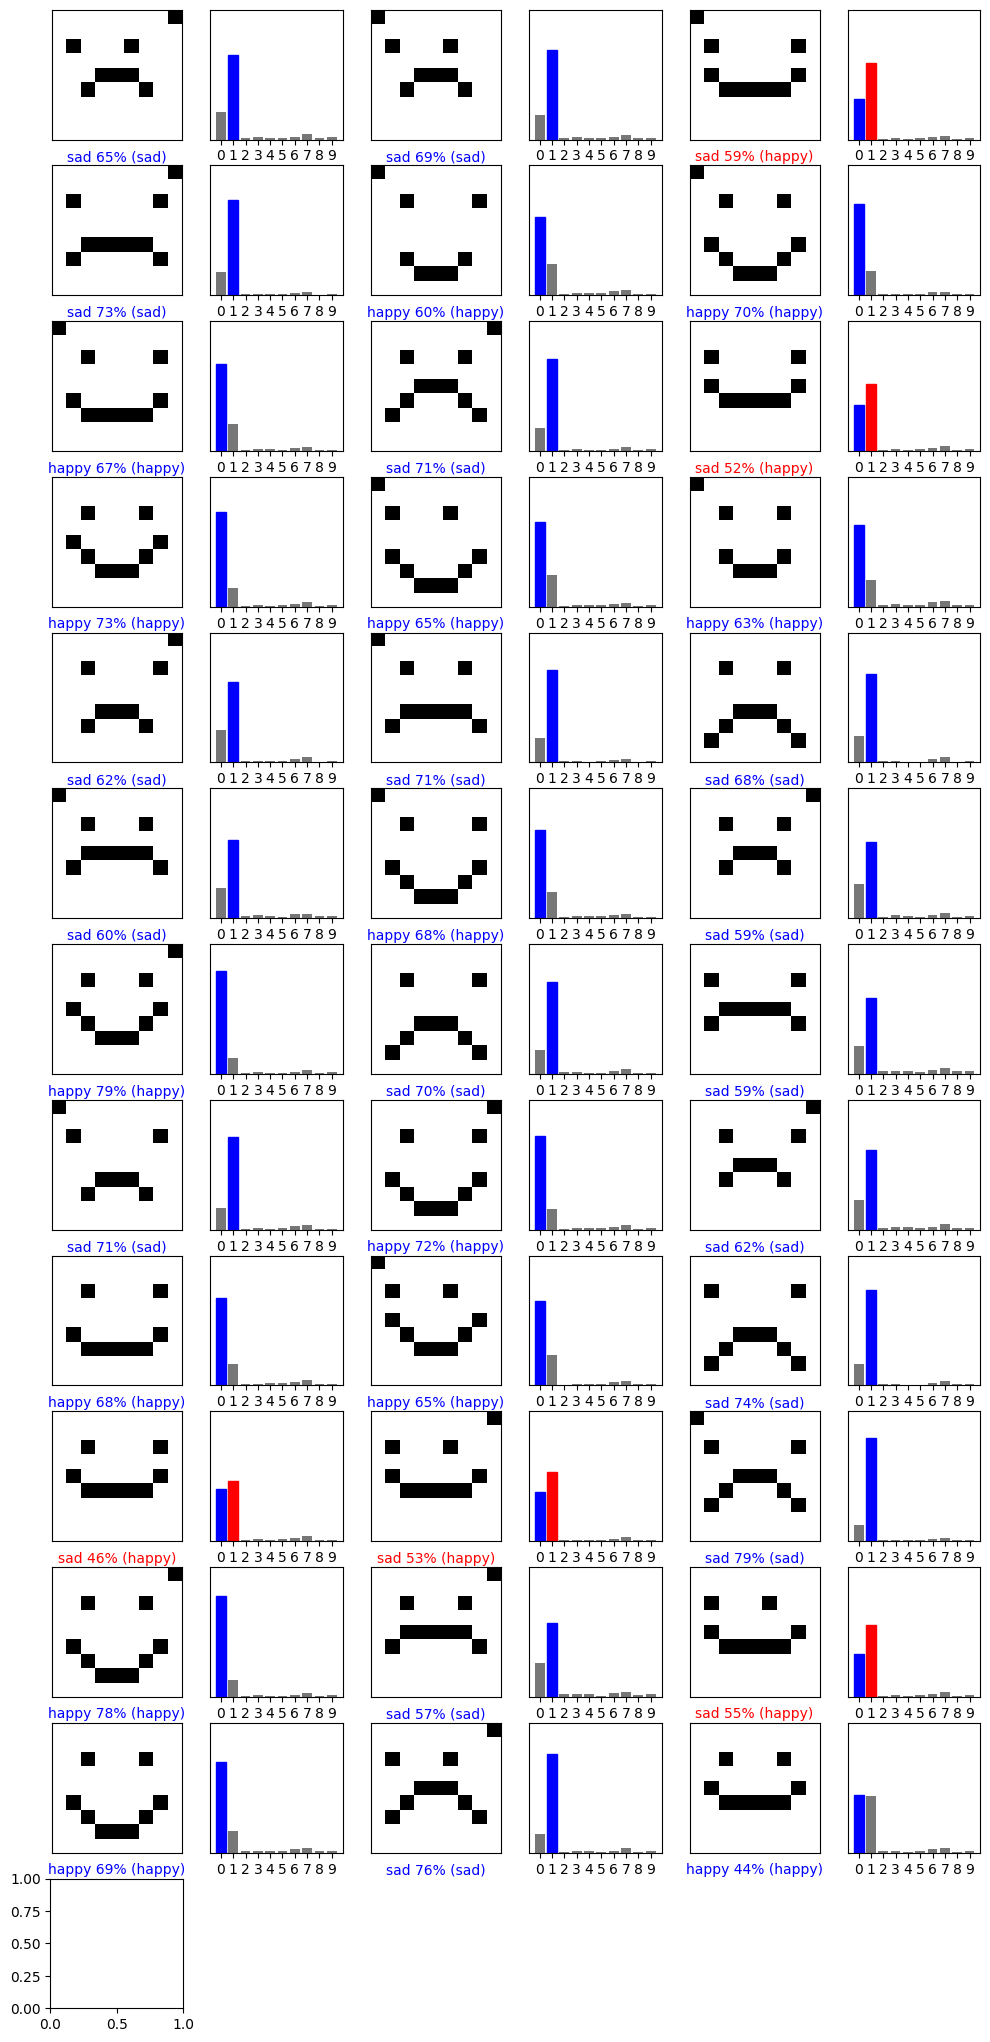

In [199]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test)
plt.tight_layout()
plt.show()

## CNN

In [200]:
x_train=x_train.reshape(108, 9, 9, 1)
x_test = x_test.reshape(36, 9, 9, 1)


In [201]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(9,9,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(1,1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [202]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 2.2533 - accuracy: 0.2963
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 1.9960 - accuracy: 0.9444
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 1.6392 - accuracy: 0.9444
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 1.1790 - accuracy: 0.9444
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7364 - accuracy: 0.9444


In [203]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy: ", test_acc)


Test Accuracy:  0.8333333134651184


In [204]:
classifications = model.predict(x_test)

2/2 [==============================] - 0s 1ms/step


In [205]:
print(classifications[3])


[0.27441442 0.61453456 0.00729479 0.00216691 0.02559922 0.01303759
 0.00357561 0.02018833 0.01760295 0.02158568]


In [206]:
np.argmax(classifications[3])

1

In [207]:
np.max(classifications[3])

0.61453456

In [208]:
class_names[np.argmax(classifications[3])]

'sad'

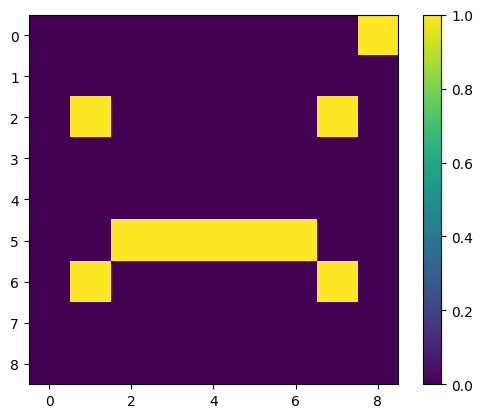

In [209]:
plt.imshow(x_test[3].reshape(9,9))
plt.colorbar()
plt.grid(False)

1/1 [==============================] - 0s 11ms/step


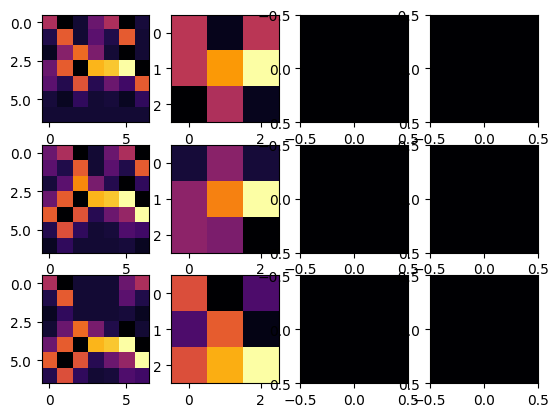

In [210]:
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

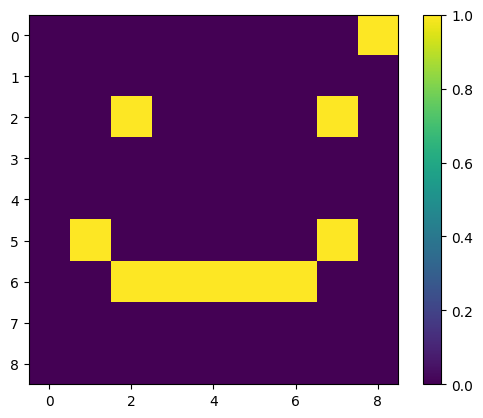

In [211]:
plt.imshow(x_train[FIRST_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

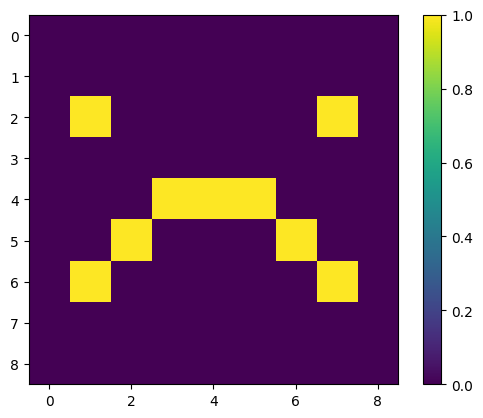

In [212]:
plt.imshow(x_train[SECOND_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

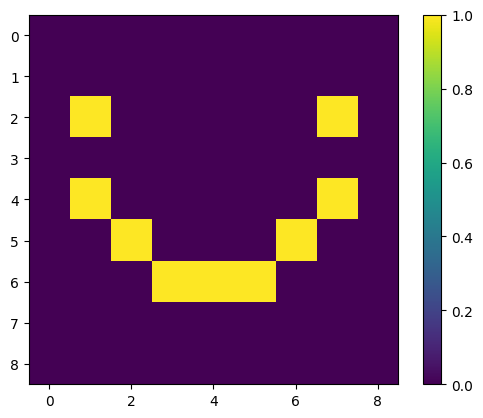

In [213]:
plt.imshow(x_train[THIRD_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)